# Supermarket Customers
#### By Raymond Arifianto Jonathan

## 1. Background
A supermarket in the US wants to create a new campaign which improves upon their previous campaigns.
However, they do not know which customer segment they should prioritize.

### Problem
The supermarket wants to identify customers who are most likely to join a promotional campaign.

With this information, they can increase the chances of generating a favorable response and maximizing the Return on Investment (ROI) for their marketing efforts as well as understanding which products to promote.

As a data analyst of the supermarket, we will try to answer the following questions:

`What are the characteristics of customers who is more willing to accept promotional campaign offers, especially compared to those who never?`

We will answer the question based on 2 types of offer acceptance:
- Initial acceptance    : The probability of a customer to accept the offer at least once
- Repeat acceptance     : The probability of a customer to accept the offer more than once among those who have at least accept once

## 2. Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings #deactivate warnings
warnings.filterwarnings('ignore')

We import the customer's data which includes their demographics, purchase history and promotional offer participation history

In [2]:
df = pd.read_csv('Supermarket Customers.csv')
df

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
...,...
2235,10870\t1967\tGraduation\tMarried\t61223\t0\t1\...
2236,4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-...
2237,7270\t1981\tGraduation\tDivorced\t56981\t0\t0\...
2238,8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-...


The data received is not in a proper CSV format, but instead is separated with a tab (\t) or is known as TSV (Tab-Separated Values).

As such, we should signify that the data is separated with a tab when importing the data via Pandas

In [3]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## 3. Data Understanding & Cleaning

### Data Dictionary

- `People -> Demographic`
    - ID: Customer's unique identifier
    - `Year_Birth: Customer's birth year`
    - `Education: Customer's education level`
    - `Marital_Status: Customer's marital status`
    - `Income: Customer's yearly household income`
    - `Kidhome: Number of children in customer's household`
    - `Teenhome: Number of teenagers in customer's household`
    - `Dt_Customer: Date of customer's enrollment with the company`
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- Products
    - MntWines: Amount spent on wine in last 2 years
    - MntFruits: Amount spent on fruits in last 2 years
    - MntMeatProducts: Amount spent on meat in last 2 years
    - MntFishProducts: Amount spent on fish in last 2 years
    - MntSweetProducts: Amount spent on sweets in last 2 years
    - MntGoldProds: Amount spent on gold in last 2 years
- `Promotion -> Promotion offer Participation History`
    - NumDealsPurchases: Number of purchases made with a discount
    - `AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise`
    - `AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise`
    - `AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise`
    - `AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise`
    - `AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise`
    - `Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise`
- Place
    - NumWebPurchases: Number of purchases made through the company’s website
    - NumCatalogPurchases: Number of purchases made using a catalog
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to the company’s website in the last month

Since we are only checking for customer's characteristics (demographic) and promotional participation history, we will only be taking the relevant data from the highlighted columns

### Checking Datatype and Null Existence

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### General Descriptive Summary

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
df.describe(include=object)

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### Unique Values

In [7]:
pd.set_option('display.max_colwidth', None)
# Unique data of each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

table1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
table1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

### Data Quality

#### General summary
- Supermarket Customer data has 28 columns and 2240 rows
- There are 24 Missing values in the `Income` column
- `ID` column consisted of unique ID for every customers. It is irrelevant to the analysis and can be dropped.
- `Year_Birth` column contains illogical birth years (aging more than 100 years old).
- `Marital_Status` column contains unexpected values: 'Alone', 'Absurd', 'YOLO'. We can change this status into 'Single' if we assume those means living alone
- `Z_CostContact` and `Z_Revenue` is not defined in the dictionary, although they only have 1 unique value so it is safe to drop them
- '2n Cycle' in `Education` should mean 'Master'
- We can get `Age` from `Year_Birth` if we assume that the last date of the data observation is equal to the maximum date of `Dt_Customer`.
- We can get total number of offers from promotion campaign accepted as `AcceptedCmp_total` from adding `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, and `Response`
- There are plenty of columns that should not/no longer be relevant to our analysis and can be dropped (after using it as references to get the needed data)
- As a continuous quantitative data, there could potentially be outliers in the column `Income`
- We can get data if a customer has ever accepted a promotional campaign offer at least once (`Target1`) and more than once (`Target2`) from `AcceptedCmp_total`
- We can create Age group of 10 from `Age` and Income level from `Income` to aid in segmentation

#### Actions
- Get `Age` from `Year_Birth` - max value of `Dt_Customer`
- Get `AcceptedCmp_total` from adding `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, and `Response`
- Drop `ID`, `Z_CostContact`, `Z_Revenue`, `Year_Birth`, `Dt_Customer`, `Recency`, `NumWebVisitsMonth`, `Complain`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases` `NumWebVisitsMonth`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`, `AcceptedCmp2`, and `Response`
- Drop `Age` with value more than 80 years old
- Check for persistent missing values in `Income`
- Check for Outliers from `Income`
- Change `Marital_Status` values of 'Alone', 'Absurd', 'YOLO' as 'Single'
- Change `Education` value of '2n Cycle' as 'Master'
- Get `Target1` and `Target2` from `AcceptedCmp_total`
- Get `Age_Group` from `Age`
- Get `Income_Level` from 'Income'

#### a. Get `Age` from `Year_Birth` - max value of `Dt_Customer`

In [8]:
#We assume that the data is taken at the same year the most recent customer enrollment
dt_customer_max = pd.to_datetime(df['Dt_Customer'].max()).year  #turn into datetime format, then get the year
dt_customer_max

2013

In [9]:
df['Age'] = dt_customer_max - df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,56
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,59
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,48
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,29
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,46
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,67
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,32
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,57


#### b. Get `AcceptedCmp_total` from adding `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, and `Response`

In [10]:
df['AcceptedCmp_total'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [11]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AcceptedCmp_total
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,56,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,59,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,48,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,29,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,46,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,67,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,32,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,57,0


##### c. Drop Unused columns

In [12]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'AcceptedCmp_total'],
      dtype='object')

In [13]:
df.drop('ID',axis=1, inplace = True)
df.drop('Z_CostContact',axis=1, inplace = True)
df.drop('Z_Revenue',axis=1, inplace = True)
df.drop('Year_Birth',axis=1, inplace = True)
df.drop('Dt_Customer',axis=1, inplace = True)
df.drop('Recency',axis=1, inplace = True)
df.drop('Complain',axis=1, inplace = True)
df.drop('MntWines',axis=1, inplace = True)
df.drop('MntFruits',axis=1, inplace = True)
df.drop('MntMeatProducts',axis=1, inplace = True)
df.drop('MntFishProducts',axis=1, inplace = True)
df.drop('MntSweetProducts',axis=1, inplace = True)
df.drop('MntGoldProds',axis=1, inplace = True)
df.drop('NumDealsPurchases',axis=1, inplace = True)
df.drop('NumWebPurchases',axis=1, inplace = True)
df.drop('NumCatalogPurchases',axis=1, inplace = True)
df.drop('NumStorePurchases',axis=1, inplace = True)
df.drop('NumWebVisitsMonth',axis=1, inplace = True)
df.drop('AcceptedCmp1',axis=1, inplace = True)
df.drop('AcceptedCmp2',axis=1, inplace = True)
df.drop('AcceptedCmp3',axis=1, inplace = True)
df.drop('AcceptedCmp4',axis=1, inplace = True)
df.drop('AcceptedCmp5',axis=1, inplace = True)
df.drop('Response',axis=1, inplace = True)


In [14]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Age,AcceptedCmp_total
0,Graduation,Single,58138.0,0,0,56,1
1,Graduation,Single,46344.0,1,1,59,0
2,Graduation,Together,71613.0,0,0,48,0
3,Graduation,Together,26646.0,1,0,29,0
4,PhD,Married,58293.0,1,0,32,0
...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,0
2236,PhD,Together,64014.0,2,1,67,1
2237,Graduation,Divorced,56981.0,0,0,32,1
2238,Master,Together,69245.0,0,1,57,0


##### d. Drop `Age` with value more than 80 years old

In [15]:
#Check for rows with age more than 80 years old
df[df['Age'] >= 80]['Age']

192    113
239    120
339    114
Name: Age, dtype: int64

There are only 3 rows with age more than 80 years old.
Since there are only a small value, it is safe to remove them

In [16]:
df = df[df['Age'] <= 80]
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Age,AcceptedCmp_total
0,Graduation,Single,58138.0,0,0,56,1
1,Graduation,Single,46344.0,1,1,59,0
2,Graduation,Together,71613.0,0,0,48,0
3,Graduation,Together,26646.0,1,0,29,0
4,PhD,Married,58293.0,1,0,32,0
...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,0
2236,PhD,Together,64014.0,2,1,67,1
2237,Graduation,Divorced,56981.0,0,0,32,1
2238,Master,Together,69245.0,0,1,57,0


#### e. Check for persistent missing values in `Income`

In [17]:
print(f"Number of Missing Values: {df['Income'].isna().sum()}")
print(f"Proportion of Missing Value: {round(df['Income'].isna().sum()/len(df)*100,2)}%")

Number of Missing Values: 24
Proportion of Missing Value: 1.07%


- Since there is only such a small amount of missing value (1.07%), we can safely drop them

In [18]:
df = df.dropna(subset=['Income'])
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Age,AcceptedCmp_total
0,Graduation,Single,58138.0,0,0,56,1
1,Graduation,Single,46344.0,1,1,59,0
2,Graduation,Together,71613.0,0,0,48,0
3,Graduation,Together,26646.0,1,0,29,0
4,PhD,Married,58293.0,1,0,32,0
...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,0
2236,PhD,Together,64014.0,2,1,67,1
2237,Graduation,Divorced,56981.0,0,0,32,1
2238,Master,Together,69245.0,0,1,57,0


#### f. Check for Outliers from `Income` and drop them

In [19]:
income = df['Income']
q1 = income.describe()['25%']
q3 = income.describe()['75%']
iqr = q3 - q1
print(f"Income IQR:\nQ1 = {q1}\nQ3 = {q3}\nIQR = {iqr}")

lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
print(f"Lower limit: {lower}\nUpper limit: {upper}")

Income IQR:
Q1 = 35246.0
Q3 = 68487.0
IQR = 33241.0
Lower limit: -14615.5
Upper limit: 118348.5


- Since the lower limit is in the negative, and income should only be a positive value, then it is safe to say that there won't be any income data that is below the lower limit

In [20]:
outlier = df[(income > upper) | (income< lower)]
display(outlier['Income'])
print(f"Number of outliers: {outlier['Income'].count()}")

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

Number of outliers: 8


- There are 8 outliers in this data. the numbers on the outer limit are all closely placed which we could assume as legitimate data, although still serving as an outlier.
- This assumption does not apply index 2233 with the value 666666, which seems very unplausible compared to the rest of the outliers.
- As such, we will replace the other values with the upper limit of the `Income` column, and remove index 2233 which contains the unplausible value 666666

In [21]:
df= df[df['Income'] < 600000]
df.loc[df['Income'] > upper, 'Income']= upper
df['Income'].max()

118348.5

#### g. Change `Marital_Status` values of 'Alone', 'Absurd', 'YOLO' as 'Single'

In [22]:
df.loc[df['Marital_Status'] == 'Alone', 'Marital_Status']= 'Single'
df.loc[df['Marital_Status'] == 'Absurd', 'Marital_Status']= 'Single'
df.loc[df['Marital_Status'] == 'YOLO', 'Marital_Status']= 'Single'
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

#### h. Change `Education` values of '2n Cycle' as 'Master'

In [23]:
df.loc[df['Education'] == '2n Cycle', 'Education']= 'Master'
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

#### i. Get `Target1` and `Target2` from `AcceptedCmp_total`

In [24]:
def check_initial(x):
    if x > 0:
        return 1
    else:
        return 0
    
def check_repeat(x):
    if x > 1:
        return 1
    else:
        return 0


df['Target1'] = df['AcceptedCmp_total'].apply(check_initial)
df['Target2'] = df['AcceptedCmp_total'].apply(check_repeat)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Age,AcceptedCmp_total,Target1,Target2
0,Graduation,Single,58138.0,0,0,56,1,1,0
1,Graduation,Single,46344.0,1,1,59,0,0,0
2,Graduation,Together,71613.0,0,0,48,0,0,0
3,Graduation,Together,26646.0,1,0,29,0,0,0
4,PhD,Married,58293.0,1,0,32,0,0,0
...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,0,0,0
2236,PhD,Together,64014.0,2,1,67,1,1,0
2237,Graduation,Divorced,56981.0,0,0,32,1,1,0
2238,Master,Together,69245.0,0,1,57,0,0,0


#### i. Create `Age_Group` from `Age`

In [25]:
def age_grouping(x):
    if x < 20:
        return "<20"
    elif x < 30:
        return '20-30'
    elif x < 40:
        return '30-40'
    elif x < 50:
        return '40-50'
    elif x < 60:
        return '50-60'
    elif x < 70:
        return '60-70'
    elif x < 80:
        return '70-80'
    
df['Age_Group'] = df['Age'].apply(age_grouping)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Age,AcceptedCmp_total,Target1,Target2,Age_Group
0,Graduation,Single,58138.0,0,0,56,1,1,0,50-60
1,Graduation,Single,46344.0,1,1,59,0,0,0,50-60
2,Graduation,Together,71613.0,0,0,48,0,0,0,40-50
3,Graduation,Together,26646.0,1,0,29,0,0,0,20-30
4,PhD,Married,58293.0,1,0,32,0,0,0,30-40
...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,0,0,0,40-50
2236,PhD,Together,64014.0,2,1,67,1,1,0,60-70
2237,Graduation,Divorced,56981.0,0,0,32,1,1,0,30-40
2238,Master,Together,69245.0,0,1,57,0,0,0,50-60


#### j. Create `Income_Level` from `Income`

In [26]:
def income_grouping(x):
    if x < 12000:
        return "a. <12k"
    elif x < 24000:
        return 'b. 12-24k'
    elif x < 36000:
        return 'c. 24-36k'
    elif x < 48000:
        return 'd. 36-48k'
    elif x < 60000:
        return 'e. 48-60k'
    elif x < 72000:
        return 'f. 60-72k'
    elif x < 84000:
        return 'g. 72-84k'
    elif x < 96000:
        return 'h. 84-96k'
    elif x < 108000:
        return 'i. 96-108k'
    elif x < 120000:
        return 'j. 108-120k'
 
    
    
    
df['Income_Level'] = df['Income'].apply(income_grouping)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Age,AcceptedCmp_total,Target1,Target2,Age_Group,Income_Level
0,Graduation,Single,58138.0,0,0,56,1,1,0,50-60,e. 48-60k
1,Graduation,Single,46344.0,1,1,59,0,0,0,50-60,d. 36-48k
2,Graduation,Together,71613.0,0,0,48,0,0,0,40-50,f. 60-72k
3,Graduation,Together,26646.0,1,0,29,0,0,0,20-30,c. 24-36k
4,PhD,Married,58293.0,1,0,32,0,0,0,30-40,e. 48-60k
...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,0,0,0,40-50,f. 60-72k
2236,PhD,Together,64014.0,2,1,67,1,1,0,60-70,f. 60-72k
2237,Graduation,Divorced,56981.0,0,0,32,1,1,0,30-40,e. 48-60k
2238,Master,Together,69245.0,0,1,57,0,0,0,50-60,f. 60-72k


### Cleaned Data

In [27]:
df[['Target1', 'Target2']].sum()

Target1    604
Target2    236
dtype: int64

In [28]:
list_cleaned = []
for col in df.columns :
    list_cleaned.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=list_cleaned)
print(df.shape)
df_desc.set_index('dataFeatures')

(2212, 11)


,dataType,null,unique,uniqueSample
dataFeatures,,,,
Education,object,0,4,"[Master, Basic]"
Marital_Status,object,0,5,"[Divorced, Married]"
Income,float64,0,1964,"[46231.0, 79607.0]"
Kidhome,int64,0,3,"[1, 0]"
Teenhome,int64,0,3,"[0, 1]"
Age,int64,0,56,"[42, 55]"
AcceptedCmp_total,int64,0,6,"[2, 4]"
Target1,int64,0,2,"[0, 1]"
Target2,int64,0,2,"[1, 0]"


- After cleaning the data, there are 2212 rows and 24 columns left.
- Dropped columns `ID`, `Z_CostContact`, `Z_Revenue`, `Year_Birth`, `Dt_Customer`, `Recency`, `NumWebVisitsMonth`, `Complain`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases` `NumWebVisitsMonth`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`, `AcceptedCmp2`, and `Response`
- Added new columns `Age`, `AcceptedCmp_total`, `Target`, and `Age_Group`
- 3 data with `Age` > 80 years old, 24 missing values as welll as 1 outlier from `Income` has been dropped.
- 7 outlier from `Income` has been changed with its upper limit
- `Marital_Status` values of 'Alone', 'Absurd', 'YOLO' has been changed as 'Single'

## 4. Data Analysis

#### A. Age

`Which age group has more tendency to accept promotional campaign offers?`

- Initial Acceptance

In [29]:
df_da1 = pd.crosstab(df['Age_Group'], df['AcceptedCmp_total'])
df_da1['Total'] = df_da1.sum(axis = 1)
df_da1.sort_values('Total',ascending=False)

AcceptedCmp_total,0,1,2,3,4,5,Total
Age_Group,,,,,,,
40-50,466,113,39,13,10,0,641
30-40,444,82,28,16,11,2,583
50-60,331,94,27,4,5,6,467
60-70,179,45,20,8,4,0,256
20-30,179,30,22,9,5,2,247
<20,5,2,1,1,1,0,10
70-80,4,2,2,0,0,0,8


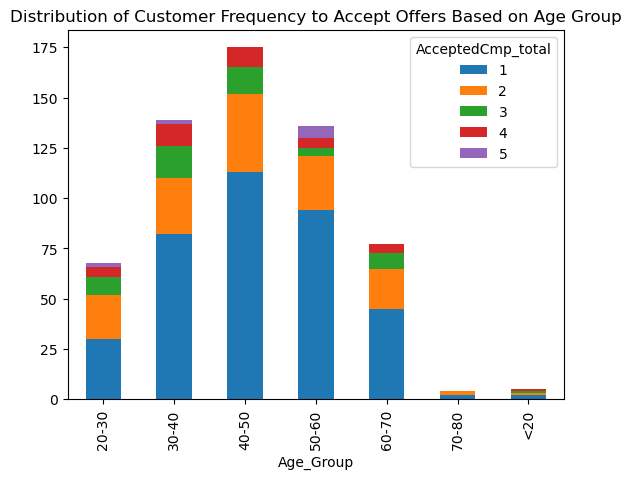

In [30]:
df_da1.reset_index(inplace= True)
df_da1.drop(['Total',0], axis = 1).plot(x='Age_Group', kind='bar', stacked=True,
        title='Distribution of Customer Frequency to Accept Offers Based on Age Group')
plt.show()

In [31]:
df_da2 = pd.crosstab(df['Age_Group'], df['Target1'])
df_da2['Total'] = df_da2.sum(axis = 1)
df_da2['Population_Proportion'] = round(df_da2['Total']/df_da2['Total'].sum()*100,2)
df_da2['Acceptance_Rate'] = round(df_da2[1] / df_da2['Total'] * 100)
df_da2['Acceptance_PProportion'] = round(df_da2[1]/df_da2[1].sum()*100,2)
df_da2.sort_values('Acceptance_Rate',ascending=False)

Target1,0,1,Total,Population_Proportion,Acceptance_Rate,Acceptance_PProportion
Age_Group,,,,,,
70-80,4,4,8,0.36,50.0,0.66
<20,5,5,10,0.45,50.0,0.83
60-70,179,77,256,11.57,30.0,12.75
50-60,331,136,467,21.11,29.0,22.52
20-30,179,68,247,11.17,28.0,11.26
40-50,466,175,641,28.98,27.0,28.97
30-40,444,139,583,26.36,24.0,23.01


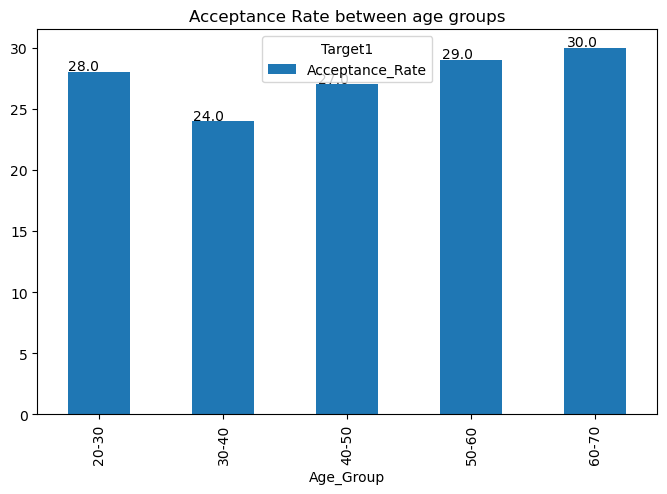

Average Acceptance Rate between age groups: 27.6


In [32]:
#remove Age group <20 and 70-80 due to insignificance
ax = df_da2.drop(['<20', '70-80'],axis = 0)
ax = ax.drop(columns=['Total','Population_Proportion',0,1, 'Acceptance_PProportion']
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Acceptance Rate between age groups',
      )
      
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()
#age 70-80 and 20 can't represent the average well because of the small size compared to the others and is being an outlier
print(f"Average Acceptance Rate between age groups: {df_da2[df_da2['Acceptance_Rate']< 50]['Acceptance_Rate'].mean()}")

Based on the analysis above, we can conclude the following statements:
- There is a lack of customers in the age group of below 20 and above 70 to get meaningful data (population proportion <1%)
- There is no customer who accepts all 6 offers, with the maximum amount of only 5 times
- Customers at the age group of `40-50 years old` contributes to the most of Promotional Campaign acceptance in the Supermarket (`28.97% of population who accept`), with ages around it follows the closer they are to the age group.
- In general, the `acceptance rate` for each age group is about the same, with the lowest being at age 30-40, and highest at age 60-70, with the `average of 27.6%` excluding data from age group <20 and 70-80
- As the acceptance rate between age group is similar, `there might not be any strong correlation between age and the likelihood of customer to consider accepting promotional campaign offers.`

In [33]:
# Check data distribution of Age
from scipy.stats import normaltest
stats, pval=normaltest(df['Age'])
if pval<=0.05:
    print('The sample data is not normally distributed') #Ha
else: 
    print('The sample data is normally distributed') #H0 

The sample data is not normally distributed


In [34]:
#Statistical test, is age different based on target groups?

from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['Target1']==i]['Age'] for i in df['Target1'].unique()])
if pval <= 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


- Based on the Statistical test, we failed to reject H0.
- Meaning, we failed to prove that there is any significant correlation between age and their willingness to accept a promotional campaign.
- This is quite logical as people at all age should still share similar characteristics when it comes to value purchases.

We can still check whether age has a significance in the frequency of acceptance among those who has ever accepted an offer (target)

- Repeat Acceptance

In [35]:
df_da3 = df_da1
df_da3['P1'] = round(df_da3[1]/df_da3.iloc[:,2:7].sum(axis = 1)*100,2)
df_da3['P2'] = round(df_da3[2]/df_da3.iloc[:,2:7].sum(axis = 1)*100,2)
df_da3['P3'] = round(df_da3[3]/df_da3.iloc[:,2:7].sum(axis = 1)*100,2)
df_da3['P4'] = round(df_da3[4]/df_da3.iloc[:,2:7].sum(axis = 1)*100,2)
df_da3['P5'] = round(df_da3[5]/df_da3.iloc[:,2:7].sum(axis = 1)*100,2)
df_da3['P(>1)'] = round(100 - df_da3['P1'],2)

df_da3.set_index('Age_Group', inplace= True)
df_da3

AcceptedCmp_total,0,1,2,3,4,5,Total,P1,P2,P3,P4,P5,P(>1)
Age_Group,,,,,,,,,,,,,
20-30,179,30,22,9,5,2,247,44.12,32.35,13.24,7.35,2.94,55.88
30-40,444,82,28,16,11,2,583,58.99,20.14,11.51,7.91,1.44,41.01
40-50,466,113,39,13,10,0,641,64.57,22.29,7.43,5.71,0.00,35.43
50-60,331,94,27,4,5,6,467,69.12,19.85,2.94,3.68,4.41,30.88
60-70,179,45,20,8,4,0,256,58.44,25.97,10.39,5.19,0.00,41.56
70-80,4,2,2,0,0,0,8,50.00,50.00,0.00,0.00,0.00,50.00
<20,5,2,1,1,1,0,10,40.00,20.00,20.00,20.00,0.00,60.00


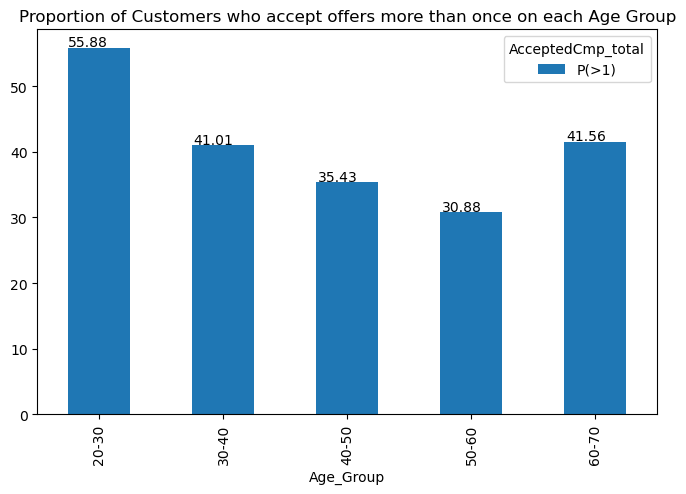

In [36]:
#remove Age group <20 and 70-80 due to insignificance
ax = df_da3.drop(['<20', '70-80'],axis = 0)
ax = ax.drop(columns=['Total',0,1,2,3,4,5,'P1','P2','P3','P4','P5']
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Proportion of Customers who accept offers more than once on each Age Group',
      )
      
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()


In [37]:
#Statistical test, is age different based on target2 groups?

from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['Target2']==i]['Age'] for i in df['Target2'].unique()])
if pval <= 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

pval

Fail to reject H0


0.17058901638123758

The failure to reject H0 is most likely due to the rise of numbers in age 60 above, making the changes non-linear.
As such, we should try to exclude the age 60 and above and see if there's any difference

In [38]:
#Statistical test, for ages below 60, is age different based on target 2?

from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['Target2']==i][df['Age']<60]['Age'] for i in df['Target2'].unique()])
if pval <= 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

pval

Reject H0


0.006767679900858421

Turns out, there is a significant correlationz between the Age of a customer and their probability to repeatedly accept offers from a promotional campaign when we limit the scope of our test to age below 60.

Based on analysis above, we can see that:
- There is tendency for younger customers to accept offers more than once (55,88%) and probability decline as age is increased
- This trend does not apply to the age group 60-70 (41.56%), in which the trend spiked to a probability similar to those at their 30-40s (41.05%).

Logically, this makes sense if we consider that younger customers should generally have less income or more expense as investment (house purchase, car loan, student loan, etc.) compared to older customers. The exeption is for those who are above 60 years old, which are on retirement, and thus need to manage their pension fund much better since they are no longer working

##### Answer to the question:
`Which age group has more tendency to accept promotional campaign offers?`
- While every age is equally willing to initially accept promotional campaign offers, there is a tendency that `the younger they are (starting from 20 years old), the more likely they accept more than once`, with the `exception for those at 60-70 years old` which has similar probability as those at 30-40 years old

#### B. Education Level

`Which education level has more tendency to accept offers from promotional campaign?`

- Initial Acceptance

In [39]:
df_de1 = pd.crosstab(df['Education'], df['AcceptedCmp_total'])
df_de1['Total'] = df_de1.sum(axis = 1)
df_de1.sort_values('Total',ascending=False)

AcceptedCmp_total,0,1,2,3,4,5,Total
Education,,,,,,,
Graduation,819,183,65,21,20,7,1115
Master,419,91,30,14,8,1,563
PhD,323,88,43,16,8,2,480
Basic,47,6,1,0,0,0,54


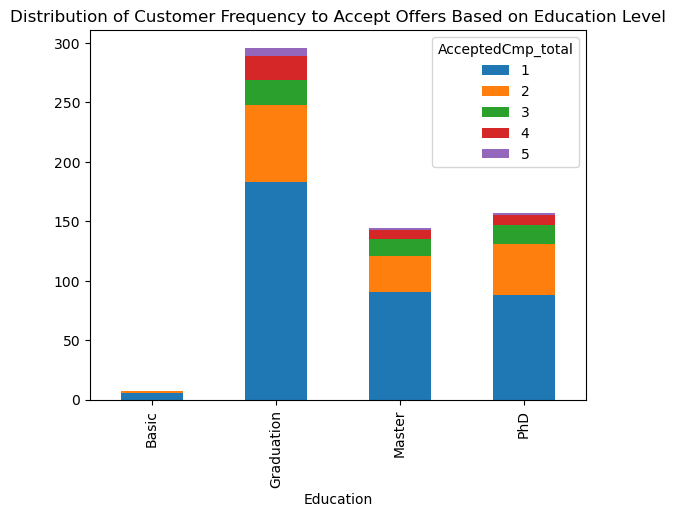

In [40]:
df_de1.reset_index(inplace= True)
df_de1.drop(['Total',0], axis = 1).plot(x='Education', kind='bar', stacked=True,
        title='Distribution of Customer Frequency to Accept Offers Based on Education Level')
plt.show()

In [41]:
df_de2 = pd.crosstab(df['Education'], df['Target1'])
df_de2['Total'] = df_de2.sum(axis = 1)
df_de2['Population_Proportion'] = round(df_de2['Total']/df_de2['Total'].sum()*100,2)
df_de2['Acceptance_Rate'] = round(df_de2[1] / df_de2['Total'] * 100)
df_de2['Acceptance_PProportion'] = round(df_de2[1]/df_de2[1].sum()*100,2)
df_de2.sort_values('Total',ascending=False)


Target1,0,1,Total,Population_Proportion,Acceptance_Rate,Acceptance_PProportion
Education,,,,,,
Graduation,819,296,1115,50.41,27.0,49.01
Master,419,144,563,25.45,26.0,23.84
PhD,323,157,480,21.70,33.0,25.99
Basic,47,7,54,2.44,13.0,1.16


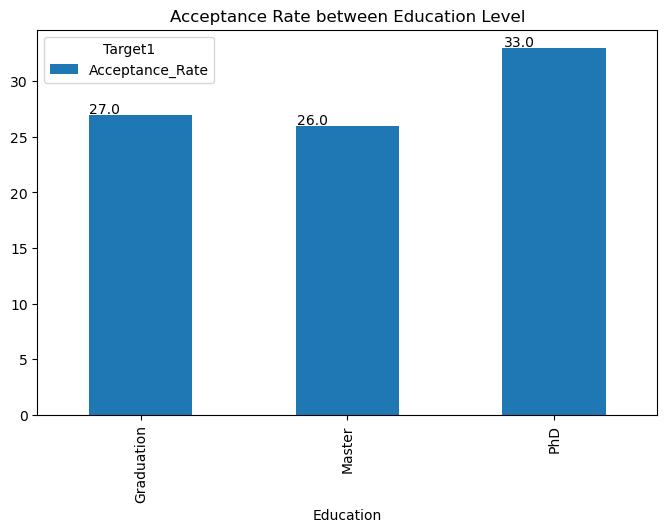

Average Acceptance Rate between Education Level: 28.67


In [42]:
#drop Basic level due to insignificance
ax = df_de2.drop('Basic',axis = 0)
ax = ax.drop(columns=['Total','Population_Proportion',0,1, 'Acceptance_PProportion']
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Acceptance Rate between Education Level',
      )
      
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()
#Basic level can't represent the average well because of the small size compared to the others and is being an outlier
print(f"Average Acceptance Rate between Education Level: {round(df_de2['Acceptance_Rate'].drop('Basic',axis = 0).mean(),2)}")

In [43]:
df_ct= pd.crosstab(df['Education'],df['Target1'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


Based on the analysis above, we can conclude the following statements:
- There is a lack of customers in the Education level of 'Basic' to get meaningful data (only 54, which consist of 2.44% of the population)
- Customers at the education level of `Graduation` (50,41% of population) contributes to the most of Promotional Campaign acceptance in the Supermarket (`49.01% of population who accept`)
- PhD customers has significantly higher acceptance rate compared to the rest at 33%, and the rest does not seem to have much difference in acceptance rate with Master at 26% and Graduation at 27%

The chi-squared test result also confirms that education level influences customer's tendency to accept promotional campaign offer at least once

- Repeat Acceptance

In [44]:
df_de3 = df_de1
df_de3['P1'] = round(df_de3[1]/df_de3.iloc[:,2:7].sum(axis = 1)*100,2)
df_de3['P2'] = round(df_de3[2]/df_de3.iloc[:,2:7].sum(axis = 1)*100,2)
df_de3['P3'] = round(df_de3[3]/df_de3.iloc[:,2:7].sum(axis = 1)*100,2)
df_de3['P4'] = round(df_de3[4]/df_de3.iloc[:,2:7].sum(axis = 1)*100,2)
df_de3['P5'] = round(df_de3[5]/df_de3.iloc[:,2:7].sum(axis = 1)*100,2)
df_de3['P(>1)'] = round(100 - df_de3['P1'],2)

df_de3.set_index('Education', inplace= True)
df_de3

AcceptedCmp_total,0,1,2,3,4,5,Total,P1,P2,P3,P4,P5,P(>1)
Education,,,,,,,,,,,,,
Basic,47,6,1,0,0,0,54,85.71,14.29,0.00,0.00,0.00,14.29
Graduation,819,183,65,21,20,7,1115,61.82,21.96,7.09,6.76,2.36,38.18
Master,419,91,30,14,8,1,563,63.19,20.83,9.72,5.56,0.69,36.81
PhD,323,88,43,16,8,2,480,56.05,27.39,10.19,5.10,1.27,43.95


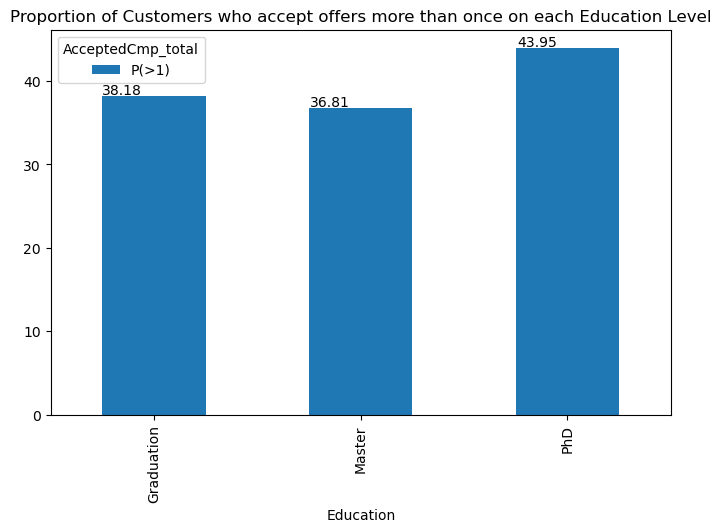

In [45]:
#remove Education level Basic due to insignificance
ax = df_de3.drop('Basic',axis = 0)
ax = ax.drop(columns=['Total',0,1,2,3,4,5,'P1','P2','P3','P4','P5']
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Proportion of Customers who accept offers more than once on each Education Level',
      )
      
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [46]:
df_ct= pd.crosstab(df['Education'],df['Target2'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


Based on the bar chart above, we can see that:
- The rankings and proportion of each education level in terms of repeat acceptance on offers rate is consistent to the initial acceptance rate
- We can safely say that customers with PhD is much more likely to accept offers both initially and repeatedly than others
- This outcome makes sense considering that a graduation-level customer should already be well-educated to be aware of opportunities to reduce their expense, so the more educated they are, the more likely they are much more financially-aware

The chi-squared test result also confirms that education level influences customer's tendency to accept promotional campaign offer more than once

##### Answer to the question:
`Which education level has more tendency to accept offers from promotional campaign?`
- Customers with `PhD Education level` is more likely to accept promotional campaigns both initially and repeatedly, and is followed quite equally by the rest

#### C. Marital Status

`Which Marital Status has more tendency to accept offers from promotional campaign?`

- Initial Acceptance

In [47]:
df_dm1 = pd.crosstab(df['Marital_Status'], df['AcceptedCmp_total'])
df_dm1['Total'] = df_dm1.sum(axis = 1)
df_dm1.sort_values('Total',ascending=False)

AcceptedCmp_total,0,1,2,3,4,5,Total
Marital_Status,,,,,,,
Married,641,128,53,18,15,2,857
Together,428,95,27,10,8,3,571
Single,327,89,35,18,5,3,477
Divorced,162,41,18,3,5,2,231
Widow,50,15,6,2,3,0,76


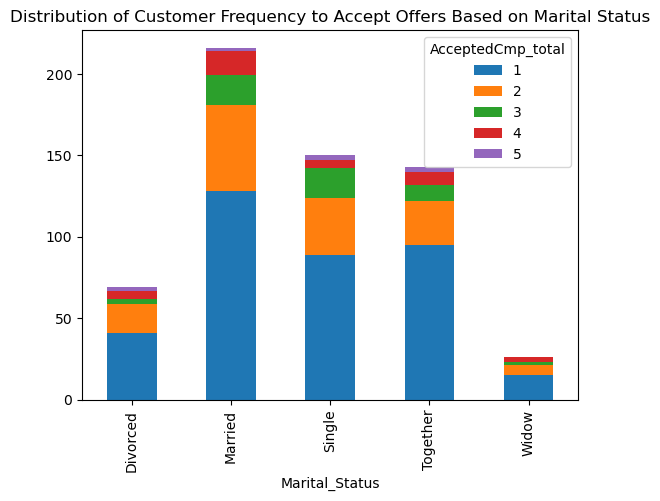

In [48]:
df_dm1.reset_index(inplace= True)
df_dm1.drop(['Total',0], axis = 1).plot(x='Marital_Status', kind='bar', stacked=True,
        title='Distribution of Customer Frequency to Accept Offers Based on Marital Status')
plt.show()

In [49]:
df_dm2 = pd.crosstab(df['Marital_Status'], df['Target1'])
df_dm2['Total'] = df_dm2.sum(axis = 1)
df_dm2['Population_Proportion'] = round(df_dm2['Total']/df_dm2['Total'].sum()*100,2)
df_dm2['Acceptance_Rate'] = round(df_dm2[1] / df_dm2['Total'] * 100)
df_dm2['Acceptance_PProportion'] = round(df_dm2[1]/df_dm2[1].sum()*100,2)
df_dm2.sort_values('Total',ascending=False)

Target1,0,1,Total,Population_Proportion,Acceptance_Rate,Acceptance_PProportion
Marital_Status,,,,,,
Married,641,216,857,38.74,25.0,35.76
Together,428,143,571,25.81,25.0,23.68
Single,327,150,477,21.56,31.0,24.83
Divorced,162,69,231,10.44,30.0,11.42
Widow,50,26,76,3.44,34.0,4.30


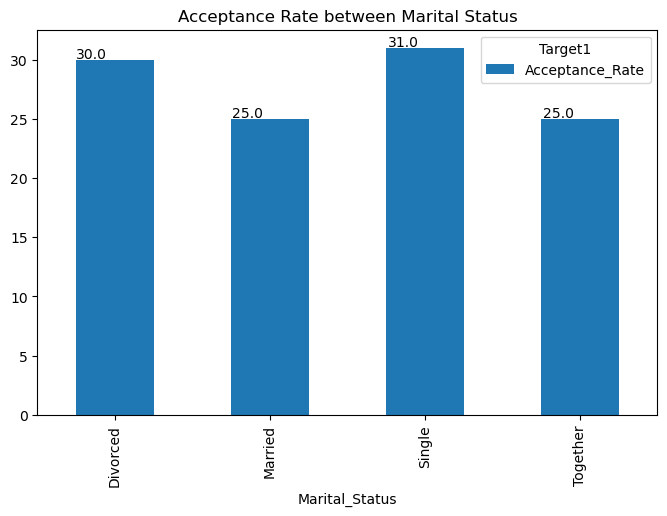

Average Acceptance Rate between Marital Status: 27.75


In [50]:
#drop Widow status due to insignificance
ax = df_dm2.drop('Widow',axis = 0)
ax = ax.drop(columns=['Total','Population_Proportion',0,1, 'Acceptance_PProportion']
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Acceptance Rate between Marital Status',
      )
      
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()
#Widow status can't represent the average well because of the small size compared to the others and is being an outlier
print(f"Average Acceptance Rate between Marital Status: {df_dm2['Acceptance_Rate'].drop('Widow',axis = 0).mean()}")

In [51]:
df_ct= pd.crosstab(df['Marital_Status'],df['Target1'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


Based on the analysis above, we can conclude the following statements:
- There is insufficient data for Widows to get meaningful data.
- Customers at the Marital Status of `Married` contributes to the most of Promotional Campaign acceptance in the Supermarket (`35.76% of population who accept`)
- Apparently, customers who has no partner (Single or Divorced) has significantly more probability to use promos compared to those who have a partner (Married or Together), and is also very consistent with max at 31% and min at 25%

This is logical since customers who has no partner have no choice but to rely on their own singular income, unlike those who have a partner in which not only income can be generated by both people, living cost can be shared to reduce it even more.

The chi-squared test result also confirms that marital status influences customer's tendency to accept promotional campaign offer at least once


- Repeat Acceptance

In [52]:
df_dm3 = df_dm1
df_dm3['P1'] = round(df_dm3[1]/df_dm3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dm3['P2'] = round(df_dm3[2]/df_dm3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dm3['P3'] = round(df_dm3[3]/df_dm3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dm3['P4'] = round(df_dm3[4]/df_dm3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dm3['P5'] = round(df_dm3[5]/df_dm3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dm3['P(>1)'] = round(100 - df_dm3['P1'],2)

df_dm3.set_index('Marital_Status', inplace= True)
df_dm3

AcceptedCmp_total,0,1,2,3,4,5,Total,P1,P2,P3,P4,P5,P(>1)
Marital_Status,,,,,,,,,,,,,
Divorced,162,41,18,3,5,2,231,59.42,26.09,4.35,7.25,2.90,40.58
Married,641,128,53,18,15,2,857,59.26,24.54,8.33,6.94,0.93,40.74
Single,327,89,35,18,5,3,477,59.33,23.33,12.00,3.33,2.00,40.67
Together,428,95,27,10,8,3,571,66.43,18.88,6.99,5.59,2.10,33.57
Widow,50,15,6,2,3,0,76,57.69,23.08,7.69,11.54,0.00,42.31


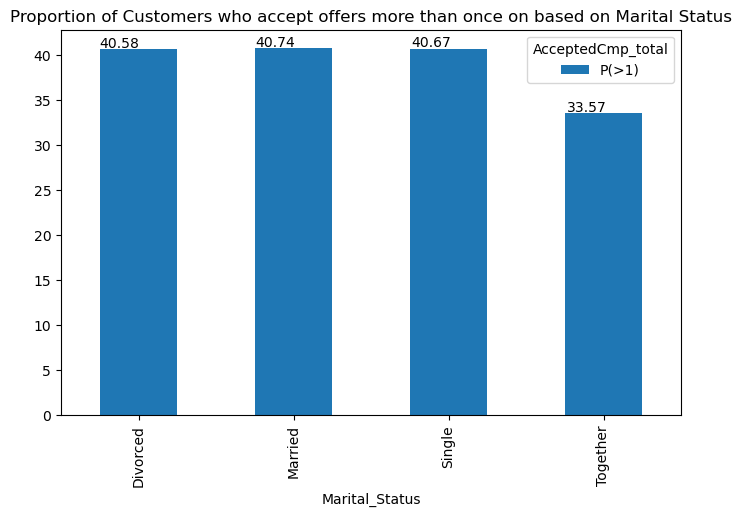

In [53]:
#remove Marital Status Widow due to insignificance
ax = df_dm3.drop('Widow',axis = 0)
ax = ax.drop(columns=['Total',0,1,2,3,4,5,'P1','P2','P3','P4','P5']
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Proportion of Customers who accept offers more than once on based on Marital Status',
      )
      
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [54]:
df_ct= pd.crosstab(df['Marital_Status'],df['Target2'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


Based on the bar chart above, we can see that:
- The proportion of customers which are divorced, married, and single who accepts offer campaigns more than once is about the same at around 40.6%
- Customers who are together (have a partner, but unmarried) has a significant drop in their proportion (33.57%) compared to the rest.

This outcome indicates that there is no clear trend regarding probability of repeated acceptance towards offers from promotional campaigns. 
While customers with marital status 'Together' had a dip in their proportion, there is no logical explanation to the phenomenon, considering the twin marital status 'Married' is also about the same like those who is unpartnered.

The chi-squared test result also fail to confirm that there is a dependency between Marital Status and customer's tendency to accept promotional campaign offer more than once

With all outcomes considered, we can assume that there is no dependency between customer's Marital Status and their probability of repeated acceptance of promotional campaign offerings 

##### Answer to the question:
`Which Marital Status has more tendency to accept offers from promotional campaign?`
- Customers who are `unpartnered (Single or Divorced)` are more likely to accept promotional campaigns at least once compared to those who are partnered, but there is no dependency between customer's Marital Status and their probability of accepting promotional campaign offers again after.

#### D. Income

`Which Income level has more tendency to accept offers from promotional campaign?`

- Initial Acceptance

In [55]:
df_di1 = pd.crosstab(df['Income_Level'], df['AcceptedCmp_total'])
df_di1['Total'] = df_di1.sum(axis = 1)
df_di1

AcceptedCmp_total,0,1,2,3,4,5,Total
Income_Level,,,,,,,
a. <12k,30,4,1,0,0,0,35
b. 12-24k,157,20,8,0,0,0,185
c. 24-36k,309,39,14,0,0,0,362
d. 36-48k,328,70,15,2,0,0,415
e. 48-60k,291,59,20,5,1,0,376
f. 60-72k,301,76,23,3,4,1,408
g. 72-84k,164,72,42,24,17,1,320
h. 84-96k,20,26,15,16,10,7,94
i. 96-108k,0,2,1,1,4,1,9


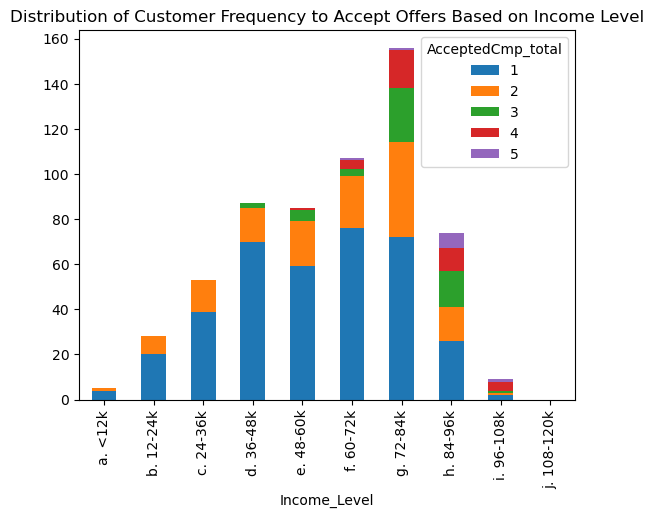

In [56]:
df_di1.reset_index(inplace= True)
df_di1.drop(['Total',0], axis = 1).plot(x='Income_Level', kind='bar', stacked=True,
        title='Distribution of Customer Frequency to Accept Offers Based on Income Level')
plt.show()

In [57]:
df_di2 = pd.crosstab(df['Income_Level'], df['Target1'])
df_di2['Total'] = df_di2.sum(axis = 1)
df_di2['Population_Proportion'] = round(df_di2['Total']/df_di2['Total'].sum()*100,2)
df_di2['Acceptance_Rate'] = round(df_di2[1] / df_di2['Total'] * 100)
df_di2['Acceptance_PProportion'] = round(df_di2[1]/df_di2[1].sum()*100,2)
df_di2.sort_values('Acceptance_Rate',ascending=False)

Target1,0,1,Total,Population_Proportion,Acceptance_Rate,Acceptance_PProportion
Income_Level,,,,,,
i. 96-108k,0,9,9,0.41,100.0,1.49
h. 84-96k,20,74,94,4.25,79.0,12.25
g. 72-84k,164,156,320,14.47,49.0,25.83
f. 60-72k,301,107,408,18.44,26.0,17.72
e. 48-60k,291,85,376,17.00,23.0,14.07
d. 36-48k,328,87,415,18.76,21.0,14.40
b. 12-24k,157,28,185,8.36,15.0,4.64
c. 24-36k,309,53,362,16.37,15.0,8.77
a. <12k,30,5,35,1.58,14.0,0.83


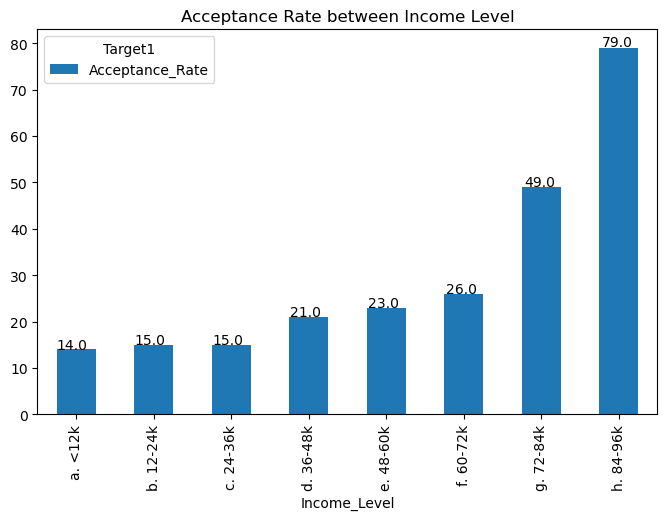

Average Acceptance Rate between income Level: 30.25


In [58]:
#remove Income level of above 96k due to insignificance
ax = df_di2.drop(['i. 96-108k', 'j. 108-120k'],axis = 0)
ax = ax.drop(columns=['Total','Population_Proportion',0,1, 'Acceptance_PProportion']
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Acceptance Rate between Income Level',
      )
      
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()
#Income level of above 96k can't represent the average well because of the small size compared to the others and is being an outlier
print(f"Average Acceptance Rate between income Level: {df_di2['Acceptance_Rate'].drop(['i. 96-108k', 'j. 108-120k'],axis = 0).mean()}")

In [59]:
# Check data distribution of Income
from scipy.stats import normaltest
stats, pval=normaltest(df['Income'])
if pval<=0.05:
    print('The sample data is not normally distributed') #Ha
else: 
    print('The sample data is normally distributed') #H0 

The sample data is not normally distributed


In [60]:
#Statistical test, is age different based on target groups?

from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['Target1']==i]['Income'] for i in df['Target1'].unique()])
if pval <= 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


Based on the analysis above, we can conclude the following statements:
- There is a lack of customers in the income level of above 96k to get meaningful data (population proportion less than 1%)
- The majority of our customers who ever accepted our offers at least once are from income level 72-84k
- Interestingly, there is a clear trend of increasing offer acceptance rate the higher their income is, with the maximum of 79% acceptance from income above 96k, and minimum of 14% at income below 12k

The mannwhitney statistical test result also confirms that there is a correlation between income and customer's tendency to accept promotional campaign offer at least once


- Repeat Acceptance

In [61]:
df_di3 = df_di1
df_di3['P1'] = round(df_di3[1]/df_di3.iloc[:,2:7].sum(axis = 1)*100,2)
df_di3['P2'] = round(df_di3[2]/df_di3.iloc[:,2:7].sum(axis = 1)*100,2)
df_di3['P3'] = round(df_di3[3]/df_di3.iloc[:,2:7].sum(axis = 1)*100,2)
df_di3['P4'] = round(df_di3[4]/df_di3.iloc[:,2:7].sum(axis = 1)*100,2)
df_di3['P5'] = round(df_di3[5]/df_di3.iloc[:,2:7].sum(axis = 1)*100,2)
df_di3['P(>1)'] = round(100 - df_di3['P1'],2)

df_di3.set_index('Income_Level', inplace= True)
df_di3

AcceptedCmp_total,0,1,2,3,4,5,Total,P1,P2,P3,P4,P5,P(>1)
Income_Level,,,,,,,,,,,,,
a. <12k,30,4,1,0,0,0,35,80.00,20.00,0.00,0.00,0.00,20.00
b. 12-24k,157,20,8,0,0,0,185,71.43,28.57,0.00,0.00,0.00,28.57
c. 24-36k,309,39,14,0,0,0,362,73.58,26.42,0.00,0.00,0.00,26.42
d. 36-48k,328,70,15,2,0,0,415,80.46,17.24,2.30,0.00,0.00,19.54
e. 48-60k,291,59,20,5,1,0,376,69.41,23.53,5.88,1.18,0.00,30.59
f. 60-72k,301,76,23,3,4,1,408,71.03,21.50,2.80,3.74,0.93,28.97
g. 72-84k,164,72,42,24,17,1,320,46.15,26.92,15.38,10.90,0.64,53.85
h. 84-96k,20,26,15,16,10,7,94,35.14,20.27,21.62,13.51,9.46,64.86
i. 96-108k,0,2,1,1,4,1,9,22.22,11.11,11.11,44.44,11.11,77.78


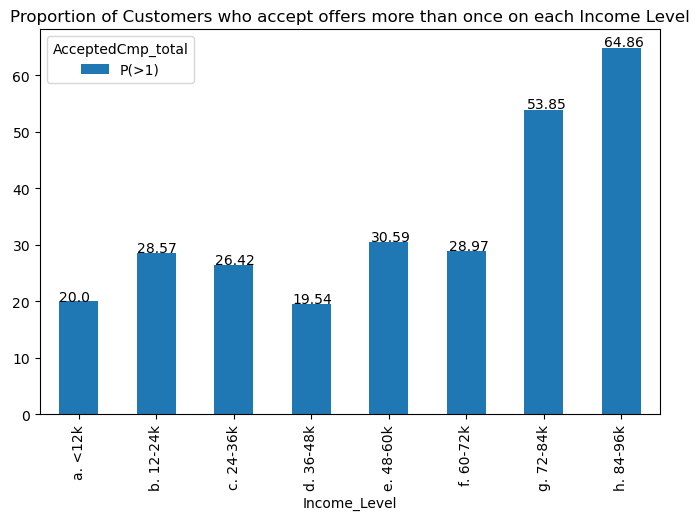

In [62]:
#remove Income level of above 96k due to insignificance
ax = df_di3.drop(['i. 96-108k', 'j. 108-120k'],axis = 0)
ax = ax.drop(columns=['Total',0,1,2,3,4,5,'P1','P2','P3','P4','P5']
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Proportion of Customers who accept offers more than once on each Income Level',
      )
      
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [63]:
#Statistical test, is income different based on target2 groups?

from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['Target2']==i]['Income'] for i in df['Target2'].unique()])
if pval <= 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


Based on the analysis above, we can see that:
- While not as consistent as initial acceptance, there is a trend that shows the increase of proportion of customers who accept promotional campaign offers more than once the higher their income is.
- There is a steady decline from 24-48k income (with lowest value of 19.54%), but it continue to rise again after so (up to 64.86%)

The Statistical test also confirms that there is a dependency between customer's income and their likelihood to repeatedly accept offers from promotional campaign


##### Answer to the question:
`Which Income level has more tendency to accept offers from promotional campaign?`
- Customers who have higher income more likely to accept promotional campaigns both initially and repeatedly, and much unlikely the lower their income is.


#### E. Children

- `In what ways do having kids influence the tendency to accept offers from promotional campaign?`
- `In what ways do having teenagers influence the tendency to accept offers from promotional campaign?`
- `In what ways do having children (both kids and teenagers) influence the tendency to accept offers from promotional campaign?`

a. Kids

- Initial Acceptance

In [64]:
df_dk1 = pd.crosstab(df['Kidhome'], df['AcceptedCmp_total'])
df_dk1['Total'] = df_dk1.sum(axis = 1)
df_dk1

AcceptedCmp_total,0,1,2,3,4,5,Total
Kidhome,,,,,,,
0,852,239,99,48,33,10,1281
1,714,126,39,3,3,0,885
2,42,3,1,0,0,0,46


Considering how low the amount of having 2 kids are compared to the rest, we will instead compare customers who have kids vs those who does not

In [65]:
def have_kid(x):
    if x == 0:
        return 0
    else:
        return 1

df_kids = df[['Kidhome','AcceptedCmp_total']]
df_kids['Have_Kid'] = df_kids['Kidhome'].apply(have_kid)
df_kids.drop('Kidhome', axis = 1, inplace = True)
df_kids

,AcceptedCmp_total,Have_Kid
0,1,0
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
2235,0,0
2236,1,1
2237,1,0
2238,0,0


In [66]:
df_dk1 = pd.crosstab(df_kids['Have_Kid'], df_kids['AcceptedCmp_total'])
df_dk1['Total'] = df_dk1.sum(axis = 1)
df_dk1

AcceptedCmp_total,0,1,2,3,4,5,Total
Have_Kid,,,,,,,
0,852,239,99,48,33,10,1281
1,756,129,40,3,3,0,931


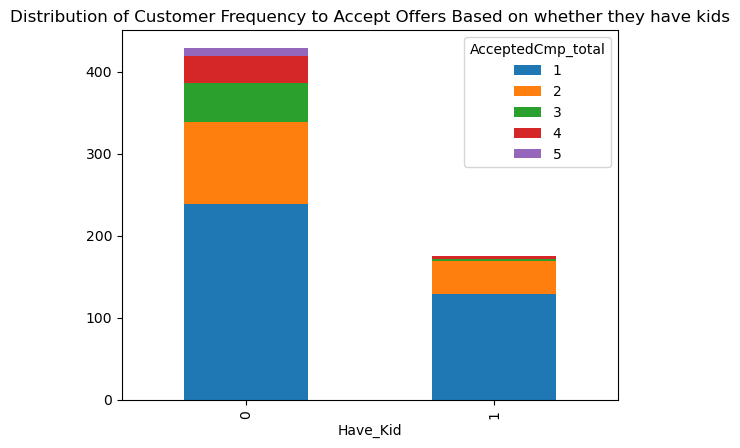

In [67]:
df_dk1.reset_index(inplace= True)
df_dk1.drop(['Total',0], axis = 1).plot(x='Have_Kid', kind='bar', stacked=True,
        title='Distribution of Customer Frequency to Accept Offers Based on whether they have kids')
plt.show()

In [68]:
df_dk2 = pd.crosstab(df_kids['Have_Kid'], df['Target1'])
df_dk2['Total'] = df_dk2.sum(axis = 1)
df_dk2['Population_Proportion'] = round(df_dk2['Total']/df_dk2['Total'].sum()*100,2)
df_dk2['Acceptance_Rate'] = round(df_dk2[1] / df_dk2['Total'] * 100)
df_dk2['Acceptance_PProportion'] = round(df_dk2[1]/df_dk2[1].sum()*100,2)
df_dk2.sort_values('Total',ascending=False)

Target1,0,1,Total,Population_Proportion,Acceptance_Rate,Acceptance_PProportion
Have_Kid,,,,,,
0,852,429,1281,57.91,33.0,71.03
1,756,175,931,42.09,19.0,28.97


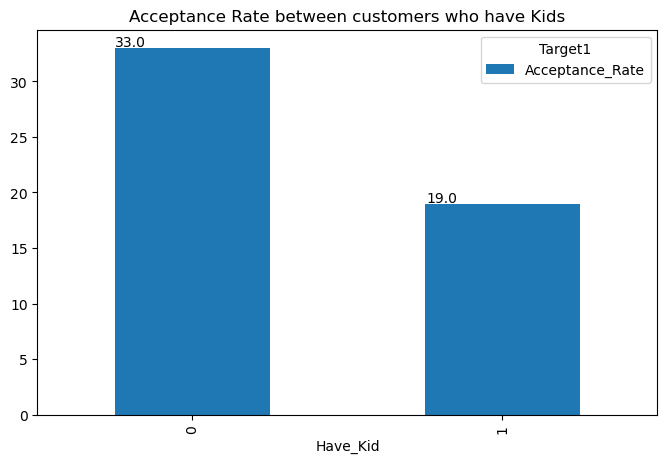

Average Acceptance Rate between customers who have Kids: 26.0


In [69]:
ax = df_dk2.drop(columns=['Total','Population_Proportion',0,1, 'Acceptance_PProportion']
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Acceptance Rate between customers who have Kids',
      )
      
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

print(f"Average Acceptance Rate between customers who have Kids: {df_dk2['Acceptance_Rate'].mean()}")

In [70]:
from statsmodels.stats.proportion import proportions_ztest
df_ct=pd.crosstab(df_kids['Have_Kid'],df['Target1'])

stats, pval=proportions_ztest(df_ct[1],df_ct.sum(axis=1)) 
if pval<=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


Based on the analysis above, we can conclude the following statements:
- Customers who have no kids contributes to the most of Promotional Campaign acceptance in the Supermarket (71.03% of population who accept)
- Customers who have no kids have significantly more probability to accept offers at least once from a promotional campaign (33%) compared to those who have kids (19%)

The Z-Test also confirms that having kids makes a difference to their tendency to take promotional offers initially


- Repeat Acceptance

In [71]:
df_dk3 = df_dk1
df_dk3['P1'] = round(df_dk3[1]/df_dk3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dk3['P2'] = round(df_dk3[2]/df_dk3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dk3['P3'] = round(df_dk3[3]/df_dk3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dk3['P4'] = round(df_dk3[4]/df_dk3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dk3['P5'] = round(df_dk3[5]/df_dk3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dk3['P(>1)'] = round(100 - df_dk3['P1'],2)

df_dk3.set_index('Have_Kid', inplace= True)
df_dk3

AcceptedCmp_total,0,1,2,3,4,5,Total,P1,P2,P3,P4,P5,P(>1)
Have_Kid,,,,,,,,,,,,,
0,852,239,99,48,33,10,1281,55.71,23.08,11.19,7.69,2.33,44.29
1,756,129,40,3,3,0,931,73.71,22.86,1.71,1.71,0.00,26.29


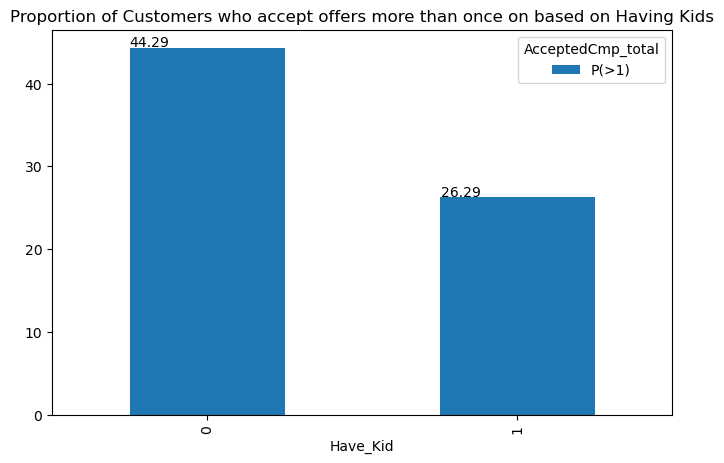

In [72]:
ax = df_dk3.drop(columns=['Total',0,1,2,3,4,5,'P1','P2','P3','P4','P5']
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Proportion of Customers who accept offers more than once on based on Having Kids',
      )
      
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [73]:
df_ct=pd.crosstab(df_kids['Have_Kid'],df['Target2'])

stats, pval=proportions_ztest(df_ct[1],df_ct.sum(axis=1)) 
if pval<=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


Based on the analysis above, we can conclude the following statements:
- Customers who have no kids are still significantly more probability to accept offers from promotional campaigns more than once (44.29%) compared to those who have kids (26.29%)
- Customers with no kids are much loyal to accepting promotional campaign, whereas there are many customers from this group that accepted the offer even more than 2 times compared to those who have kids.

The Z-Test also confirms that having kids makes a difference to their tendency to take promotional offers repeatedly

In a logical sense, the most probable reason to this is because when it comes to children needs, customers has more tendency to purchase groceries to fulfill their young kids' neededs or requests without waiting for a discount. On the other hand, customers who doesn't have kids might not have the same difficulties to inhibit their desire to wait for a discount before purchasing since they only have to worry for themselves and other much more mature family members (spouse & teenagers).

##### Answer to the question:
`In what ways do having kids influence the tendency to accept offers from promotional campaign?`
- Customers who do not have kids are more likely to accept promotional campaigns both initially and repeatedly compared to those who have


b. Teenager

In [74]:
df_dt1 = pd.crosstab(df['Teenhome'], df['AcceptedCmp_total'])
df_dt1['Total'] = df_dk1.sum(axis = 1)
df_dt1

AcceptedCmp_total,0,1,2,3,4,5,Total
Teenhome,,,,,,,
0,765,205,94,39,33,8,2706.29
1,804,155,43,11,2,2,1988.28
2,39,8,2,1,1,0,NaN


The same case as Kids, considering how low the amount of having 2 teenagers are compared to the rest, we will instead compare customers who have teens vs those who does not

In [75]:
def have_teen(x):
    if x == 0:
        return 0
    else:
        return 1

df_teen = df[['Teenhome','AcceptedCmp_total']]
df_teen['Have_Teen'] = df_teen['Teenhome'].apply(have_teen)
df_teen.drop('Teenhome', axis = 1, inplace = True)
df_teen

,AcceptedCmp_total,Have_Teen
0,1,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
2235,0,1
2236,1,1
2237,1,0
2238,0,1


In [76]:
df_dt1 = pd.crosstab(df_teen['Have_Teen'], df_teen['AcceptedCmp_total'])
df_dt1['Total'] = df_dt1.sum(axis = 1)
df_dt1

AcceptedCmp_total,0,1,2,3,4,5,Total
Have_Teen,,,,,,,
0,765,205,94,39,33,8,1144
1,843,163,45,12,3,2,1068


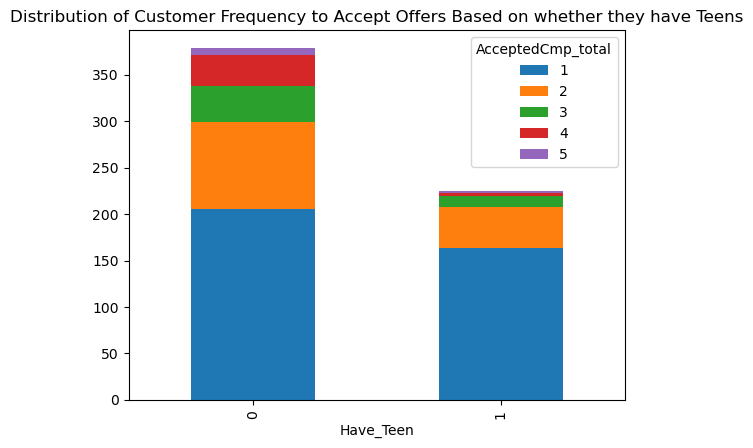

In [77]:
df_dt1.reset_index(inplace= True)
df_dt1.drop(['Total',0], axis = 1).plot(x='Have_Teen', kind='bar', stacked=True,
        title='Distribution of Customer Frequency to Accept Offers Based on whether they have Teens')
plt.show()

In [78]:
df_dt2 = pd.crosstab(df_teen['Have_Teen'], df['Target1'])
df_dt2['Total'] = df_dt2.sum(axis = 1)
df_dt2['Population_Proportion'] = round(df_dt2['Total']/df_dt2['Total'].sum()*100,2)
df_dt2['Acceptance_Rate'] = round(df_dt2[1] / df_dt2['Total'] * 100)
df_dt2['Acceptance_PProportion'] = round(df_dt2[1]/df_dt2[1].sum()*100,2)
df_dt2.sort_values('Total',ascending=False)

Target1,0,1,Total,Population_Proportion,Acceptance_Rate,Acceptance_PProportion
Have_Teen,,,,,,
0,765,379,1144,51.72,33.0,62.75
1,843,225,1068,48.28,21.0,37.25


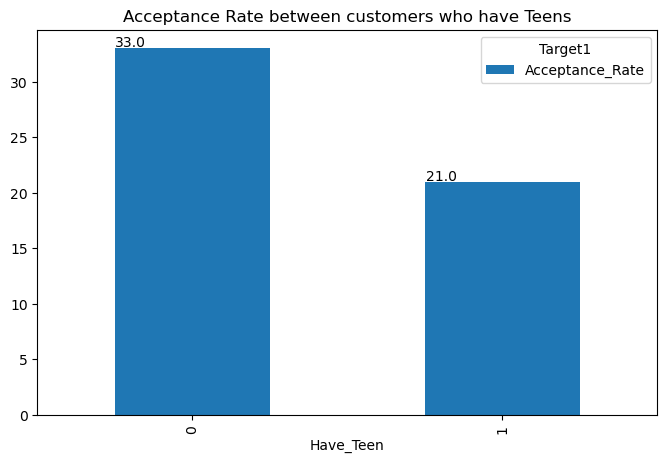

Average Acceptance Rate between customers who have Teens: 27.0


In [79]:
ax = df_dt2.drop(columns=['Total','Population_Proportion',0,1, 'Acceptance_PProportion']
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Acceptance Rate between customers who have Teens',
      )
      
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

print(f"Average Acceptance Rate between customers who have Teens: {df_dt2['Acceptance_Rate'].mean()}")

In [80]:
df_ct=pd.crosstab(df_teen['Have_Teen'],df['Target1'])

stats, pval=proportions_ztest(df_ct[1],df_ct.sum(axis=1)) 
if pval<=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


Based on the analysis above, we can conclude the following statements:
- Customers who have no Teens contributes to the most of Promotional Campaign acceptance in the Supermarket (62.75% of population who accept)
- Customers who have no Teens have significantly more probability to accept offers at least once from a promotional campaign (33%) compared to those who have Teens (21%)
- This result is very consistent with customers who have kids, where Customers who have no kids have significantly more probability to accept offers at least once from a promotional campaign (33%) compared to those who have kids (19%).
- The Proportion of acceptance rate belonging to those who does not have teens are the exact same to those who does not have kids, meanwhile there is 2% higher probability for those who have teens to accept promotional offers compared to those who have kids.

The Z-Test also confirms that having teens makes a difference to their tendency to take promotional offers initially


- Repeat Acceptance

In [81]:
df_dt3 = df_dt1
df_dt3['P1'] = round(df_dt3[1]/df_dt3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dt3['P2'] = round(df_dt3[2]/df_dt3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dt3['P3'] = round(df_dt3[3]/df_dt3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dt3['P4'] = round(df_dt3[4]/df_dt3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dt3['P5'] = round(df_dt3[5]/df_dt3.iloc[:,2:7].sum(axis = 1)*100,2)
df_dt3['P(>1)'] = round(100 - df_dt3['P1'],2)

df_dt3.set_index('Have_Teen', inplace= True)
df_dt3

AcceptedCmp_total,0,1,2,3,4,5,Total,P1,P2,P3,P4,P5,P(>1)
Have_Teen,,,,,,,,,,,,,
0,765,205,94,39,33,8,1144,54.09,24.8,10.29,8.71,2.11,45.91
1,843,163,45,12,3,2,1068,72.44,20.0,5.33,1.33,0.89,27.56


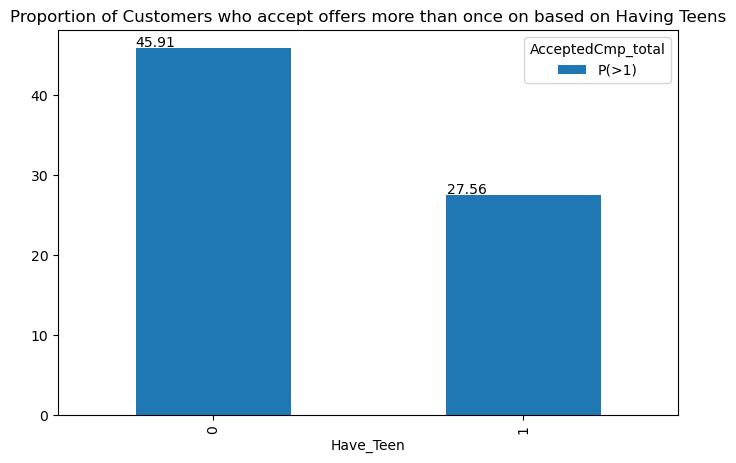

In [82]:
ax = df_dt3.drop(columns=['Total',0,1,2,3,4,5,'P1','P2','P3','P4','P5']
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Proportion of Customers who accept offers more than once on based on Having Teens',
      )
      
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [83]:
df_ct=pd.crosstab(df_teen['Have_Teen'],df['Target2'])

stats, pval=proportions_ztest(df_ct[1],df_ct.sum(axis=1)) 
if pval<=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


Based on the analysis above, we can conclude the following statements:
- Customers who have no kids and teens (in general, no children) contributes to the most of Promotional Campaign acceptance in the Supermarket
- Customers who have no teenagers are still significantly more probability to accept offers from promotional campaigns more than once (45.91%) compared to those who have teenagers (27.56%)
- Customers with no teenagers are also much loyal to accepting promotional campaign, whereas there are many customers from this group that accepted the offer even more than 2 times compared to those who have teenagers.
- Again, this is very similar to the influence of having kids toward the tendency to accept offers more than once, with a minor difference of 1.27% higher probability for those with teens to accept promotional offers compared to those who have kids

The Z-Test also confirms that having kids makes a difference to their tendency to take promotional offers repeatedly


##### Answer to the question:
`In what ways do having teenagers influence the tendency to accept offers from promotional campaign?`
- Customers who do not have teenagers are more likely to accept promotional campaigns both initially and repeatedly compared to those who have


In conclusion, we can see that:
- There is a consistent trend for those who does not have any children (kids or teens) to be significantly more willing to accept promotional campaign offers than those who have, both initially and repeatedly.
- Customers who does not have children are much more loyal to accepting offers, especially more than twice, than those who have.
- While not mutually exclusive, there is a consistent tendency that customers who have teens are more willing to accept promotional campaign offers than those who have kids, both initially and repeatedly.

The most probable logical reasoning to this may come from the fact that customers who does not have any children only need to take care of themselves (adults) who can inhibit their purchasing desire to wait for a promo. Teens are much better at inhibiting than those younger (kids), and as such customers with teens have better tendency to accept offers compared to those with kids.

##### Answer to the question:
`In what ways do having children (both kids and teenagers) influence the tendency to accept offers from promotional campaign?`
- Customers who do not have any children are more likely to accept promotional campaigns both initially and repeatedly compared to those who have.
- On the other hand, those who have young children (kids) has the least tendency to accept promotional campaign offers


## Conclusion and Recommendation

From the analysis that have been done, we can make the following conclusions regarding customers who are willing to accept promotional campaign offers:
- Out of 2212 customers, only 604 (27.31%) has ever accepted any promotional campaign offers, and 236 (10.67%) has ever accepted more than once 

- The `majority` of our customers who have ever accepted our campaign offers at least once have the following characteristics:
    - `Age Group of 40-50 years old and around`
    - `Education Level of Graduation`
    - `Marital status of 'Married'`
    - `Income level of 72-82k and around`
    - `Customers who have no kids or teenagers at home`
- Customers who are the most likely to accept promotional campaign offers at least once (`initially`) have the following characteristics:
    - `Education Level of PhD`
    - `Unpartnered (Marital Status of 'Single' or 'Divorced')`
    - `High income (the higher, the more likely)`
    - `No Non-Adult Children at home`
- Customers who are the most likely to accept promotional campaign offers more than once (`repeatedly`) have the following characteristics:
    - `Young Customers, followed by those who are retired`
    - `Education Level of PhD`
    - `High income (the higher, the more likely)`
    - `No Non-Adult Children at home`

In contrast, the following conclusions can be made for those who are the least likely to accept any promotional campaign offers:
- `Older customers up to 60 years old` are much less loyal to offers.
- `Educational level of 'Masters'` have the least tendency to accept offers, just slightly lower than 'Graduation' level
- `Partnered customers (Marital Status of Married and Together)` have the least tendency to accept offers
- `Customers with low income (the lower, the less likely)`
- `Have Children at home, especially young kids`


In conclusion, we have found the characteristics of customers who are more willing to accept promotional campaign offers, which are:
- `Young or Retired (>60)`
- `Education Level of PhD`
- `Unpartnered (Marital Status of 'Single' or 'Divorced')`
- `High income`
- `No Non-Adult Children at home`


#### Recommendations

1. Focus on advertising and creating promotional campaigns towards `highly-educated (especially PhD level), young, and unpartnered customers with high income` to create a new, very loyal customer base as the majority
2. Maintain promotion offers for `married customers in the age group of 40-50 years old with a graduation level of education and an income level of 72-82k (and around that range)` to maintain the current majority sure-fire customer base, up until the new loyal customer base has grown big enough
3. Avoid promoting products that exclusively resonate with customers that have non-adult children
4. In general, put more products that resonate better with higher income customers on sale
5. Put more products that resonate better with retired customers (age 60 and above) on sale
6. Conduct `in-depth analysis on the purchasing behaviour of customers` to understand which products to promote
7. Conduct analysis on `customer's method of purchase preference` as well as the performance of each method to understand more effective ways to create promotional campaigns
8. I`nclude data on the Gender` of the customer for future analysis

By accurately identifying the customers who are the most willing to accept promotional campaigns, both initially and repeatedly, we believe that this will help the supermarket reduce marketing Return of Investment (RoI) time, increase marketing effectivity, and potentially grow a loyal customer base that respond well to promotions